In [1]:
import bz2
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from colossus.cosmology import cosmology  
from colossus.halo import mass_so
from colossus.lss import mass_function
from bisect import bisect_left
import healpy as hp
import skymapper as skm
import scipy.stats

def vc(M,Omega_m,Omega_lambda,h,z):
    Delta_c = mass_so.deltaVir(z)
    v_c=96.6*((Delta_c*Omega_m*(h**2)/24.4)**(1/6))*(((1+z)/3.3)**(1/2))*((M/10**11)**(1/3))
    return v_c

def M_HI(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,Delta_c,v_c):
    #v_c=96.6*((Delta_c*Omega_m*(h**2)/24.4)**(1/6))*(((1+z)/3.3)**(1/2))*((M/10**11)**(1/3))
    f=(Omega_b/Omega_m)*(0.75) # (1-Y)*Omega_b/Omega_m
    return alpha*f*M*((M*h/1e11)**beta)*np.exp(-(v_c0/v_c)**3)*np.exp(-(v_c/v_c1)**3)

def n_sin_A(Masa, z):
    n_sin_A = mass_function.massFunction(Masa, z, mdef = 'fof', model = 'crocce10', q_out = 'dndlnM')
    return n_sin_A

def n(Masa, z):
    n = (1/A)*mass_function.massFunction(Masa, z, mdef = 'fof', model = 'crocce10', q_out = 'dndlnM')
    return n


if __name__ == "__main__":
    data = pd.read_csv("/scratch/davfer/Cosmohub/9477.csv.bz2", sep=",", comment='#', na_values=r'\N')

In [2]:
    unique_halo_id = data['unique_halo_id'].values
    v_vir_cosmohub = data['v_vir'].values
    z_cosmohub = data['z_cgal'].values
    M_cosmohub = 10**data['lmhalo'].values
    ra_gal = data['ra_gal'].values
    dec_gal = data['dec_gal'].values

    print(len(unique_halo_id),len(v_vir_cosmohub),len(z_cosmohub),len(M_cosmohub),flush=True)
    print(len(set(unique_halo_id)),flush=True)

    inds = []
    unique_halo_id_sin_repetir = []
    seen = set()
    for i, halo in enumerate(unique_halo_id):
        if halo not in seen:
            inds.append(i)
            unique_halo_id_sin_repetir.append(halo)
            seen.add(halo)

    unique_halo_id = unique_halo_id_sin_repetir
    v_vir_cosmohub = v_vir_cosmohub[inds]
    z_cosmohub = z_cosmohub[inds]
    M_cosmohub = M_cosmohub[inds]
    ra_gal = ra_gal[inds]
    dec_gal = dec_gal[inds]

499609997 499609997 499609997 499609997
329344245


329344245 329344245 329344245


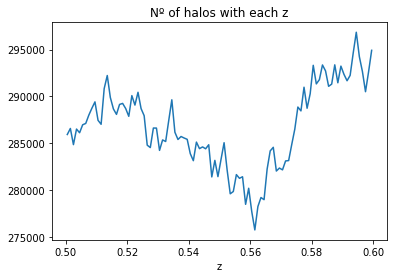

In [3]:
    print(len(v_vir_cosmohub),len(z_cosmohub),len(M_cosmohub), flush=True)

    params = cosmology.cosmologies['planck15']
    params['Om0'] = 0.25
    params['Ob0'] = 0.044
    params['Ode0'] = 0.75
    params['H0'] = 70
    params['sigma8'] = 0.8
    params['ns'] = 0.95
    cosmo = cosmology.setCosmology('planck15',params)


    # Parámetros de MICECAT (Best fit (WHISP))
    Omega_m = 0.25
    Omega_b = 0.044
    Omega_lambda = 0.75
    h = 0.7
    alpha = 0.17
    beta = -0.55
    v_c0 = 37.1535  #km/s
    v_c1 = 24547.08916 #km/s
    M=np.logspace(10,15,100)  #En unidades solares

    
    M_0_5_0_6_cosmohub = []
    z_0_5_0_6_cosmohub = []
    ra_gal_0_5_0_6 = []
    dec_gal_0_5_0_6 = []
    v_vir_cosmohub_0_5_0_6 = []

    
    indexz = np.where((z_cosmohub>0.5)&(z_cosmohub<0.6))[0]
    M_0_5_0_6_cosmohub = M_cosmohub[indexz]
    z_0_5_0_6_cosmohub = z_cosmohub[indexz]
    ra_gal_0_5_0_6 = ra_gal[indexz]
    dec_gal_0_5_0_6 = dec_gal[indexz]
    v_vir_cosmohub_0_5_0_6 = v_vir_cosmohub[indexz]

    M_0_5_0_6_cosmohub = np.array(M_0_5_0_6_cosmohub)
    z_0_5_0_6_cosmohub = np.array(z_0_5_0_6_cosmohub)
    ra_gal_0_5_0_6 = np.array(ra_gal_0_5_0_6)
    dec_gal_0_5_0_6 = np.array(dec_gal_0_5_0_6)
    v_vir_cosmohub_0_5_0_6 = np.array(v_vir_cosmohub_0_5_0_6)
    
    zhist,edges_z= np.histogram(z_0_5_0_6_cosmohub,bins=100)
    z_array = (edges_z[:-1] + edges_z[1:])/2
    plt.figure()
    plt.plot(z_array,zhist)
    plt.xlabel('z')
    plt.title('Nº of halos with each z')
    plt.savefig('../Plots/Hist_z_0_5_0_6_catalogo_completo.png')
    plt.show()
    
    np.savetxt('/scratch/davfer/Cosmohub/z_array_0_5_0_6.txt',z_array)
    np.savetxt('/scratch/davfer/Cosmohub/z_hist_0_5_0_6.txt',zhist)

Densidad crítica(z=0.55) 666633533671.0624 (7.85 10^11) Msol h^3 /Mpc^3
89.98098 -0.000154 grados
90.0 -269.999996 grados
90.0 -0.00086 grados
90.0 -269.999996 grados


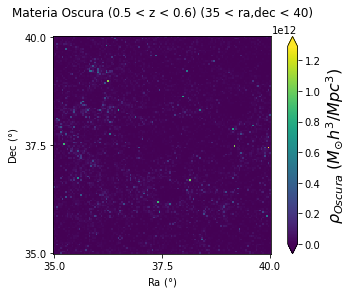

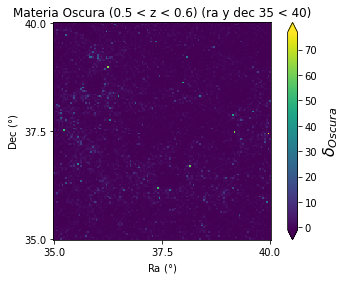

90.000154 0.019019999999997594
90.0 -269.999996


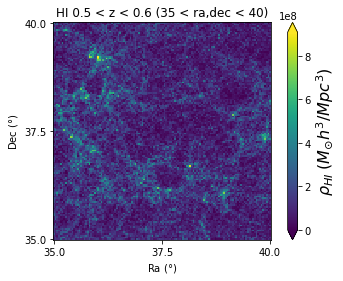

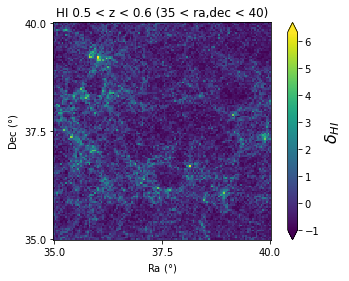

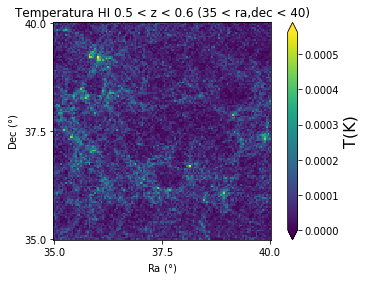

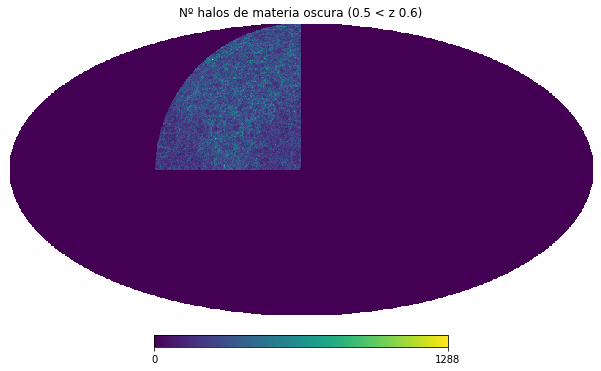

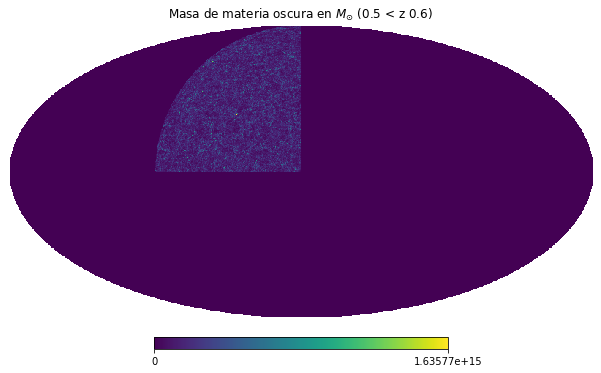

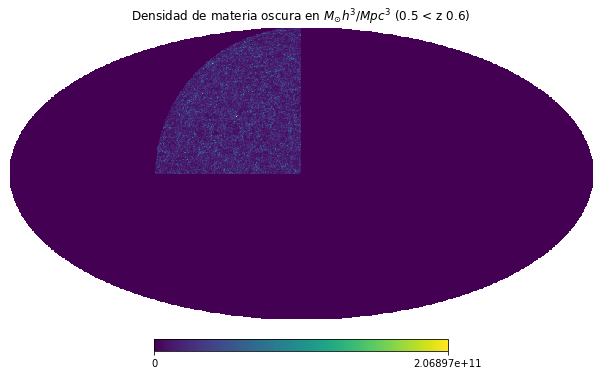

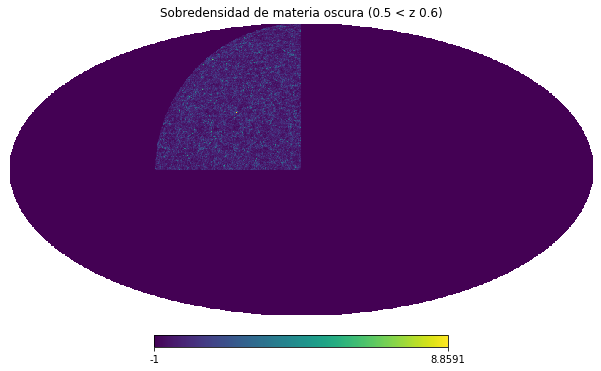

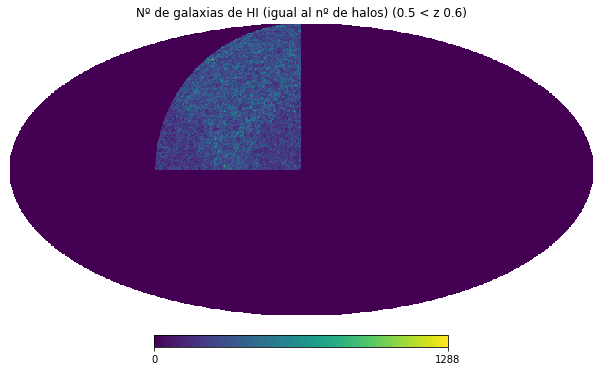

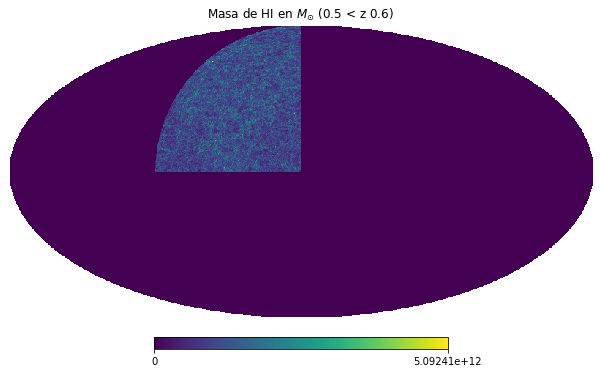

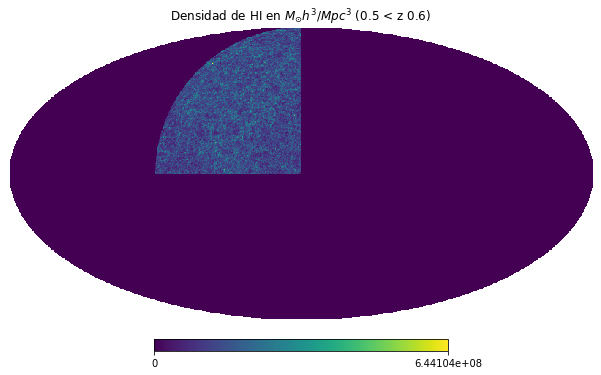

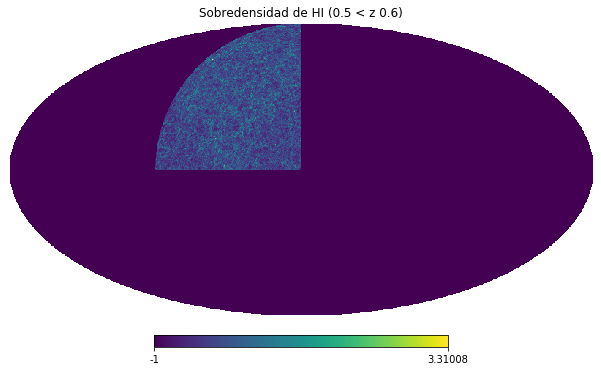

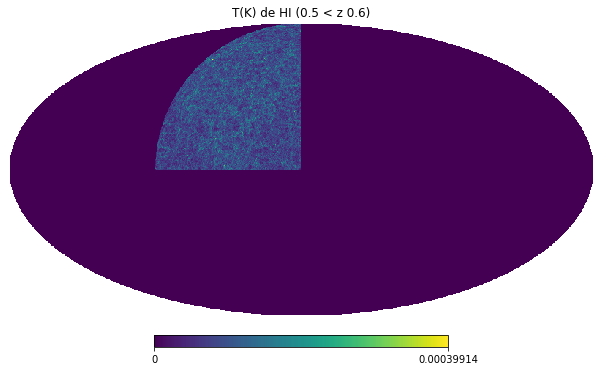

In [4]:
    densidad_critica = cosmo.rho_c(0.55)*1e9/h
    print('Densidad crítica(z=0.55)',densidad_critica,'(7.85 10^11) Msol h^3 /Mpc^3', flush=True)
   
    print(max(dec_gal_0_5_0_6),min(dec_gal_0_5_0_6),'grados', flush=True)
    print(max(ra_gal_0_5_0_6),min(ra_gal_0_5_0_6),'grados', flush=True)
    
    print(max(dec_gal),min(dec_gal),'grados', flush=True)
    print(max(ra_gal),min(ra_gal),'grados', flush=True)
    
    n = 128
    
    lado_ra = np.linspace(0,90,n+1)  #129 fronteras para que haya 128 celdas
    lado_dec = (180/np.pi)*np.arccos(np.linspace(np.cos(0),np.cos(np.pi/2),n+1))
    lado_dec_lin = np.linspace(0,90,n+1)
    lado_dec_izq = lado_dec[:-1]
    lado_dec_der = lado_dec[1:]
    lado_dec_lin_izq = lado_dec_lin[:-1]
    lado_dec_lin_der = lado_dec_lin[1:]


    delta_ra = lado_ra[1] - lado_ra[0]
    delta_dec = lado_dec[1] - lado_dec[0]

    Vcelda_esferica = (((np.cos(lado_dec_izq*2*np.pi/360)-np.cos(lado_dec_der*2*np.pi/360))*delta_ra*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)
    Vcelda_esferica_lin = (((np.cos(lado_dec_lin_izq*2*np.pi/360)-np.cos(lado_dec_lin_der*2*np.pi/360))*delta_ra*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)


    #Esta vez se van a ir guardando según sus coordenadas angulares

    #Se clasifican en celdas de manera que el límite superior de la celda cuenta 
    #como la celda anterior (excepto el primer límite de la primera celda,
    #que cuenta como la primera celda).


    
    lado_ra_sample = np.linspace(35,40,n+1)  #129 fronteras para que haya 128 celdas
    lado_dec_sample = np.linspace(35,40,n+1)


    delta_ra_sample = lado_ra_sample[1] - lado_ra_sample[0]
    delta_dec_sample = lado_dec_sample[1] - lado_dec_sample[0]

    Vcelda_esferica_sample = (((1-np.cos(delta_dec_sample*2*np.pi/360))*delta_ra_sample*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)
    V_corteza = (4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)

    Vcelda_esferica_sample = (((1-np.cos(delta_dec_sample*2*np.pi/360))*delta_ra_sample*2*np.pi/360)/(4*np.pi))*V_corteza

    Vcelda_esferica_sample_2 = (delta_ra_sample*delta_dec_sample/(4*np.pi*(180/np.pi)**2))*V_corteza

    Vcelda_esferica_sample_3 = (5**2/(4*np.pi*(180/np.pi)**2))*V_corteza/n**2 


    #Esta vez se van a ir guardando según sus coordenadas angulares

    #Se clasifican en celdas de manera que el límite superior de la celda cuenta 
    #como la celda anterior (excepto el primer límite de la primera celda,
    #que cuenta como la primera celda).

    dec_gal_sample = dec_gal_0_5_0_6[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
    ra_gal_sample = ra_gal_0_5_0_6[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
    M_sample = M_0_5_0_6_cosmohub[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
    z_cosmohub_sample = z_0_5_0_6_cosmohub[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
    v_vir_sample = v_vir_cosmohub_0_5_0_6[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
    

    Densidad_sample_2D_oscura = np.zeros((n,n))

    angulos_dec = []
    angulos_ra = []

    for dec,ra,m in zip(dec_gal_sample,ra_gal_sample,M_sample):
        ang_dec = bisect_left(lado_dec_sample, dec)  #np.digitize
        ang_dec = ang_dec - 1
        if ang_dec == -1:
            ang_dec = 0
        ang_ra = bisect_left(lado_ra_sample, ra)
        ang_ra = ang_ra - 1
        if ang_ra == -1:
            ang_ra = 0
        angulos_dec.append(ang_dec)
        angulos_ra.append(ang_ra)
        Densidad_sample_2D_oscura[ang_dec,ang_ra] = Densidad_sample_2D_oscura[ang_dec,ang_ra] + (m/Vcelda_esferica_sample_2)
    Densidad_media_sample_2D_oscura = np.mean(Densidad_sample_2D_oscura)
    Sobredensidad_media_sample_2D_oscura = Densidad_sample_2D_oscura/Densidad_media_sample_2D_oscura - 1
    #Primer indice controla la fila
    #y el segundo la columna de esa matriz.


    #plt.figure()
    fig_imshow = plt.imshow(Densidad_sample_2D_oscura)
    ax = plt.gca() 
    ax.invert_yaxis()
    plt.xlabel(r'Ra ($\degree$)')
    plt.ylabel(r'Dec ($\degree$)')
    plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
    plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
    ax.set_title('Materia Oscura (0.5 < z < 0.6) (35 < ra,dec < 40)',pad=20)
    cbar = plt.colorbar(fig_imshow, extend='both')
    cbar.set_label(r'$\rho_{Oscura} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
    plt.savefig('../Plots/Dens_oscura_0_5_0_6_sample_catalogo_completo_jupyter.png')
    plt.show()
    
    #plt.figure()
    fig_imshow = plt.imshow(Sobredensidad_media_sample_2D_oscura)
    plt.gca().invert_yaxis()
    plt.xlabel(r'Ra ($\degree$)')
    plt.ylabel(r'Dec ($\degree$)')
    plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
    plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
    plt.title('Materia Oscura (0.5 < z < 0.6) (ra y dec 35 < 40)')
    cbar = plt.colorbar(fig_imshow, extend='both')
    cbar.set_label(r'$\delta_{Oscura}$',fontsize=16)
    plt.savefig('../Plots/Sobredens_oscura_0_5_0_6_sample_catalogo_completo_jupyter.png')
    plt.show()
    
    


    A12 = 2.876e-15 ##Hz
    h_planck =6.62607004e-34 #m2 kg / s
    nu21 = 1420e6 #Hz
    m_h = 1.673723e-27 #kg
    kboltz = 1.38064852e-23 #m2 kg s-2 K-1
    c_light_meter = 3.0e8 #ms-1	

    #Se clasifican en celdas de manera que el límite superior de la celda cuenta 
    #como la celda anterior (excepto el primer límite de la primera celda,
    #que cuenta como la primera celda)
    


    Densidad_sample_0_5_0_6_2D_HI = np.zeros((n,n)) 
    b  = np.zeros((n,n))
    for ra,dec,m,Z in zip(ra_gal_sample,dec_gal_sample,M_HI(M_sample,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z_cosmohub_sample,mass_so.deltaVir(z_cosmohub_sample),v_vir_sample),z_cosmohub_sample):
        ang_dec = bisect_left(lado_dec_sample, dec)  #np.digitize
        ang_dec = ang_dec - 1
        if ang_dec == -1:
            ang_dec = 0
        ang_ra = bisect_left(lado_ra_sample, ra)
        ang_ra = ang_ra - 1
        if ang_ra == -1:
            ang_ra = 0
        angulos_dec.append(ang_dec)
        angulos_ra.append(ang_ra)
        
        Densidad_sample_0_5_0_6_2D_HI[ang_dec,ang_ra] = Densidad_sample_0_5_0_6_2D_HI[ang_dec,ang_ra] + (m/Vcelda_esferica_sample_2)
        b[ang_dec,ang_ra] = b[ang_dec,ang_ra] + (((1+Z)**2)*1.989e30)*(m/Vcelda_esferica_sample_2)/(((3.086e22)**3/h**3)*cosmo.Hz(Z)*1e3/3.086e22) 
    a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
    T_sample_0_5_0_6_2D = a*b
    Densidad_media_sample_0_5_0_6_HI = np.mean(Densidad_sample_0_5_0_6_2D_HI)
    Sobredensidad_media_sample_0_5_0_6_HI = Densidad_sample_0_5_0_6_2D_HI/Densidad_media_sample_0_5_0_6_HI - 1
        
    
    
    #Primer indice controla la fila y el segundo la columna de la matriz.


    plt.figure()
    fig_imshow = plt.imshow(Densidad_sample_0_5_0_6_2D_HI)
    plt.gca().invert_yaxis()
    plt.xlabel(r'Ra ($\degree$)')
    plt.ylabel(r'Dec ($\degree$)')
    plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
    plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
    plt.title('HI 0.5 < z < 0.6 (35 < ra,dec < 40)')
    cbar = plt.colorbar(fig_imshow, extend='both')
    cbar.set_label(r'$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
    plt.savefig('../Plots/Dens_HI_0_5_0_6_sample_catalogo_completo_jupyter.png')

    plt.figure()
    fig_imshow = plt.imshow(Sobredensidad_media_sample_0_5_0_6_HI)
    plt.gca().invert_yaxis()
    plt.xlabel(r'Ra ($\degree$)')
    plt.ylabel(r'Dec ($\degree$)')
    plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
    plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
    plt.title('HI 0.5 < z < 0.6 (35 < ra,dec < 40)')
    cbar = plt.colorbar(fig_imshow, extend='both')
    cbar.set_label(r'$\delta_{HI}$',fontsize=16)
    plt.savefig('../Plots/Sobredens_HI_0_5_0_6_sample_catalogo_completo_jupyter.png')

    plt.figure()
    fig_imshow = plt.imshow(T_sample_0_5_0_6_2D)
    plt.gca().invert_yaxis()
    plt.xlabel(r'Ra ($\degree$)')
    plt.ylabel(r'Dec ($\degree$)')
    plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
    plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
    plt.title('Temperatura HI 0.5 < z < 0.6 (35 < ra,dec < 40)')
    cbar = plt.colorbar(fig_imshow, extend='both')
    cbar.set_label('T(K)',fontsize=16)
    plt.savefig('../Plots/T_HI_0_5_0_6_sample_catalogo_completo_jupyter.png')

	
    theta_gal_0_5_0_6 = 90 - dec_gal_0_5_0_6
    phi_gal_0_5_0_6 = ra_gal_0_5_0_6

    lado_theta = (180/np.pi)*np.arccos(np.linspace(np.cos(0),np.cos(np.pi/2),101)) #Dejar esto así o hacerlo 
    lado_phi = np.linspace(0,90,101)                                               #lineal?

    lado_theta_izq = lado_theta[:-1]
    lado_theta_der = lado_theta[1:]

    delta_phi = lado_phi[1] - lado_phi[0]

    nside = 256
    Apixel = hp.nside2pixarea(nside, degrees=False)


    Vcelda_esferica_pix = ((Apixel)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)

    npix = hp.nside2npix(nside)

    Vcelda_esferica_pix2 = (1/npix)*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)

    print(max(theta_gal_0_5_0_6),min(theta_gal_0_5_0_6), flush=True)
    print(max(phi_gal_0_5_0_6),min(phi_gal_0_5_0_6))
    
    ipix_zona_ocupada = []
    for pix in range(npix):
        if (0 <= hp.pix2ang(nside,pix)[0] <= np.pi/2)&(0 <= hp.pix2ang(nside,pix)[1] <= np.pi/2):
            ipix_zona_ocupada.append(pix)


    #Esta vez se van a ir guardando según sus coordenadas angulares

    #Se clasifican en celdas de manera que el límite superior de la celda cuenta 
    #como la celda anterior (excepto el primer límite de la primera celda,
    #que cuenta como la primera celda).

    halo_ipix = []
    mass_oscura_map = np.zeros(npix)
    dens_oscura_map = np.zeros(npix)
    
    for theta,phi,m in zip(theta_gal_0_5_0_6,phi_gal_0_5_0_6,M_0_5_0_6_cosmohub):
        
        ipix = hp.ang2pix(nside,(np.pi/180)*theta,(np.pi/180)*phi)
        halo_ipix.append(ipix)
        mass_oscura_map[ipix] = mass_oscura_map[ipix]+m
        dens_oscura_map[ipix] = dens_oscura_map[ipix]+m/Vcelda_esferica_pix    
    
    map_oscura = np.bincount(halo_ipix)
    map_oscura = list(map_oscura)
    map_oscura = map_oscura + [0]*(npix-len(map_oscura))
    map_oscura = np.array(map_oscura)
    
    dens_oscura_map = list(dens_oscura_map)
    dens_oscura_map = np.array(dens_oscura_map)
    
    dens_oscura_media = np.mean(dens_oscura_map[ipix_zona_ocupada])
    sobredens_oscura_map = dens_oscura_map/dens_oscura_media - 1
    
    mass_oscura_map = list(mass_oscura_map)
    mass_oscura_map = np.array(mass_oscura_map)
    
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_mass_oscura_0_5_0_6_catalogo_completo_jupyter.fits',map_oscura,nest=False,coord='C',overwrite=True)
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_map_oscura_0_5_0_6_catalogo_completo.fits',mass_oscura_map,nest=False,coord='C',overwrite=True)
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_oscura_0_5_0_6_catalogo_completo_jupyter.fits',dens_oscura_map,nest=False,coord='C',overwrite=True)
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_sobredens_oscura_0_5_0_6_catalogo_completo_jupyter.fits',sobredens_oscura_map,nest=False,coord='C',overwrite=True)
    
  
    hp.mollview(map_oscura,title='Nº halos de materia oscura (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_map_oscura_0_5_0_6_catalogo_completo.png')
    plt.show()
    
    hp.mollview(mass_oscura_map,title=r'Masa de materia oscura en $M_{\odot}$ (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_mass_oscura_0_5_0_6_catalogo_completo_jupyter.png')
    plt.show()
    
    hp.mollview(dens_oscura_map,title='Densidad de materia oscura en $M_{\odot}h^3/{Mpc}^3$ (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_dens_oscura_0_5_0_6_catalogo_completo_jupyter.png')
    plt.show()
    
    hp.mollview(sobredens_oscura_map,title='Sobredensidad de materia oscura (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_sobredens_0_5_0_6_oscura_catalogo_completo_jupyter.png')
    plt.show()
    
    #Ahora igual pero con las coordenadas angulares

    #Se clasifican en celdas de manera que el límite superior de la celda cuenta 
    #como la celda anterior (excepto el primer límite de la primera celda,
    #que cuenta como la primera celda)

    HI_ipix = []
    dens_HI_map = np.zeros(npix)
    mass_HI_map = np.zeros(npix)
    T_HI_map = np.zeros(npix)

    for theta,phi,m,Z in zip(theta_gal_0_5_0_6,phi_gal_0_5_0_6,M_HI(M_0_5_0_6_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z_0_5_0_6_cosmohub,mass_so.deltaVir(z_0_5_0_6_cosmohub),v_vir_cosmohub_0_5_0_6),z_0_5_0_6_cosmohub):
        ipix = hp.ang2pix(nside,(np.pi/180)*theta,(np.pi/180)*phi)
        HI_ipix.append(ipix)
        dens_HI_map[ipix] = dens_HI_map[ipix]+m/Vcelda_esferica_pix
        mass_HI_map[ipix] = mass_HI_map[ipix]+m
        a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
        b = ((1+Z)**2)/(cosmo.Hz(Z)*1e3/3.086e22)
        c = (m/Vcelda_esferica_pix)*1.989e30/((3.086e22)**3/h**3)
        T_HI_map[ipix] = T_HI_map[ipix] + a*b*c



    map_HI = np.bincount(HI_ipix)
    map_HI = list(map_HI)
    map_HI = map_HI + [0]*(npix-len(map_HI))
    map_HI = np.array(map_HI)

    dens_HI_map = list(dens_HI_map)
    dens_HI_map = np.array(dens_HI_map)
    
    dens_HI_media = np.mean(dens_HI_map[ipix_zona_ocupada])
    sobredens_HI_map = dens_HI_map/dens_HI_media - 1
    
    mass_HI_map = list(mass_HI_map)
    mass_HI_map = np.array(mass_HI_map)

    T_HI_map = list(T_HI_map)
    T_HI_map = np.array(T_HI_map)
    
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_mass_HI_0_5_0_6_catalogo_completo_jupyter.fits',map_HI,nest=False,coord='C',overwrite=True)
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_map_HI_0_5_0_6_catalogo_completo.fits',mass_HI_map,nest=False,coord='C',overwrite=True)
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_HI_0_5_0_6_catalogo_completo_jupyter.fits',dens_HI_map,nest=False,coord='C',overwrite=True)
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_sobredens_HI_0_5_0_6_catalogo_completo_jupyter.fits',sobredens_HI_map,nest=False,coord='C',overwrite=True)
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_T_HI_0_5_0_6_catalogo_completo_jupyter.fits',T_HI_map,nest=False,coord='C',overwrite=True)
    
    
    hp.mollview(map_HI,title='Nº de galaxias de HI (igual al nº de halos) (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_map_HI_0_5_0_6_catalogo_completo_jupyter.png')
    plt.show()
    
    hp.mollview(mass_HI_map,title=r'Masa de HI en $M_{\odot}$ (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_mass_HI_0_5_0_6_catalogo_completo_jupyter.png')
    plt.show()
    
    hp.mollview(dens_HI_map,title=r'Densidad de HI en $M_{\odot}h^3/{Mpc}^3$ (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_dens_HI_0_5_0_6_catalogo_completo_jupyter.png')
    plt.show()
    
    hp.mollview(sobredens_HI_map,title=r'Sobredensidad de HI (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_sobredens_HI_0_5_0_6_catalogo_completo_jupyter.png')
    plt.show()
    
    hp.mollview(T_HI_map,title='T(K) de HI (0.5 < z 0.6)')
    plt.savefig('../Plots/Mollview_T_HI_0_5_0_6_catalogo_completo_jupyter.png')
    plt.show()

A este redshift y número de píxeles, la escala de píxeles es de 1 Mpc aproximadamente.

In [4]:
    T_0_5_0_6_mollview_media = np.mean(T_HI_map[ipix_zona_ocupada])
    print('T(K) media (0.5 < z < 0.6) =',T_0_5_0_6_mollview_media)

T(K) media (0.5 < z < 0.6) = 1.2272848610885805e-06


optimizing parameters of Mollweide to minimize stdDistortion
best objective 0.136679 at Mollweide(45.363361900328904)


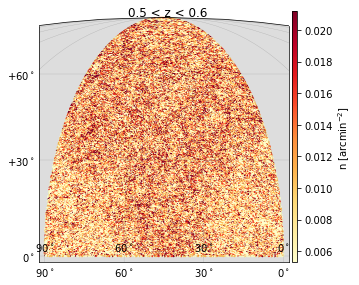

In [5]:
    crit = skm.stdDistortion
    proj = skm.Mollweide.optimize(ra_gal_0_5_0_6,dec_gal_0_5_0_6,crit=crit)
    map = skm.Map(proj)
    sep = 30
    map.grid(sep=sep)
    mappable = map.density(ra_gal_0_5_0_6, dec_gal_0_5_0_6, nside=nside)
    cb = map.colorbar(mappable, cb_label="n [arcmin$^{-2}$]")
    map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
    map.title('0.5 < z < 0.6')
    plt.savefig('../Plots/Skymapper_Dens_angular_0_5_0_6_catalogo_completo_jupyter.png')
    map.show()

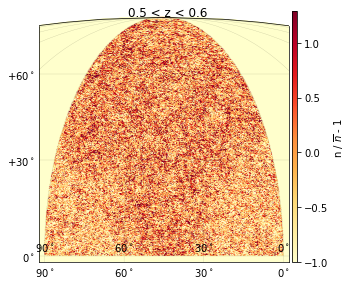

In [6]:
    Apixel_arcmin_cuadrados = hp.nside2pixarea(nside, degrees=True)*60**2
    Dens_cuentas_arcmin_cuadrado = map_oscura/Apixel_arcmin_cuadrados
    Dens_cuentas_arcmin_cuadrado_media = np.mean(Dens_cuentas_arcmin_cuadrado[ipix_zona_ocupada])
    Sobredens_cuentas_arcmin_cuadrado = Dens_cuentas_arcmin_cuadrado/Dens_cuentas_arcmin_cuadrado_media - 1
    
    hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Skymapper_Sobredens_angular_0_5_0_6_catalogo_completo_jupyter.fits',Sobredens_cuentas_arcmin_cuadrado,nest=False,coord='C',overwrite=True)
    
    map = map.clone()
    mappable = map.healpix(Sobredens_cuentas_arcmin_cuadrado,nest=False,color_percentiles=[10,99])
    cb = map.colorbar(mappable, cb_label=r"n / $\overline{n}$ - 1")
    map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
    map.title('0.5 < z < 0.6')
    plt.savefig('../Plots/Skymapper_Sobredens_angular_0_5_0_6_catalogo_completo_jupyter.png')
    map.show()

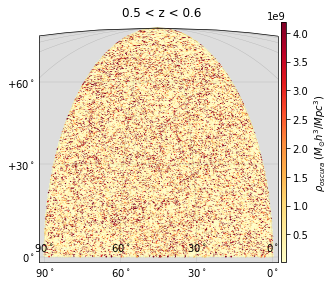

In [7]:
    map = map.clone()
    mappable = map.healpix(dens_oscura_map,nest=False)
    cb = map.colorbar(mappable, cb_label=r"$\rho_{oscura} \; (M_{\odot}h^3/{Mpc}^3)$")
    map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
    map.title('0.5 < z < 0.6')
    plt.savefig('../Plots/Skymapper_Dens_Oscura_0_5_0_6_catalogo_completo_jupyter.png')
    map.show()

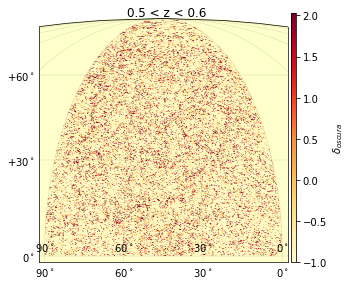

In [8]:
    map = map.clone()
    mappable = map.healpix(sobredens_oscura_map,nest=False,color_percentiles=[10,99])
    cb = map.colorbar(mappable, cb_label=r"$\delta_{oscura}$")
    map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
    map.title('0.5 < z < 0.6')
    plt.savefig('../Plots/Skymapper_Sobredens_Oscura_0_5_0_6_catalogo_completo_jupyter.png')
    map.show()

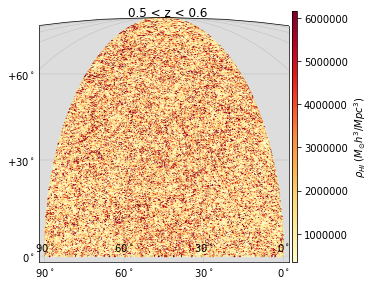

In [9]:
    map = map.clone()
    mappable = map.healpix(dens_HI_map,nest=False)
    cb = map.colorbar(mappable, cb_label=r"$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$")
    map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
    map.title('0.5 < z < 0.6')
    plt.savefig('../Plots/Skymapper_Dens_HI_0_5_0_6_catalogo_completo_jupyter.png')
    map.show()

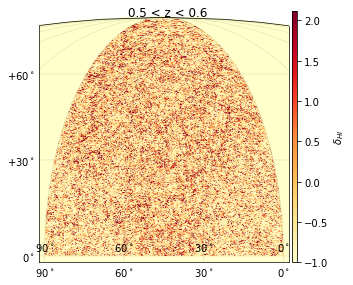

In [10]:
    map = map.clone()
    mappable = map.healpix(sobredens_HI_map,nest=False,color_percentiles=[10,99])
    cb = map.colorbar(mappable, cb_label=r"$\delta_{HI}$")
    map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
    map.title('0.5 < z < 0.6')
    plt.savefig('../Plots/Skymapper_Sobredens_HI_0_5_0_6_catalogo_completo_jupyter.png')
    map.show()

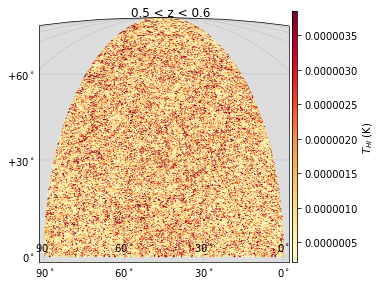

In [11]:
    map = map.clone()
    mappable = map.healpix(T_HI_map,nest=False)
    cb = map.colorbar(mappable, cb_label=r"$T_{HI}$ (K)")
    map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
    map.title('0.5 < z < 0.6')
    plt.savefig('../Plots/Skymapper_T_HI_0_5_0_6_catalogo_completo_jupyter.png')
    map.show()

Añadir la dispersión.

In [12]:
data_halo = data.iloc[inds]
data_sample = data_halo.iloc[indexz]
data_sample.to_csv("/scratch/davfer/Cosmohub/sample_9305_0_5_0_6.csv.bz2")